In [9]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [3]:
signal = np.fromfile('signal.dat', dtype=float)
incompletos = np.fromfile('incompletos.dat', dtype=float)

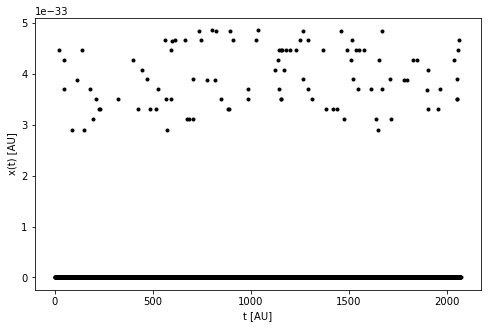

In [4]:
#Grafica de signal e incompletos
plt.figure(figsize=(8,5))
plt.plot(signal,'k.')
plt.xlabel('t [AU]')
plt.ylabel('x(t) [AU]')
plt.title('Datos originales')
plt.savefig('GomezMaria_signal.pdf')
#plt.show()

In [5]:
#Transformada de Fourier
def fourier(x):
    N = len(x)
    expo = np.exp(-2*np.pi*1j/N)
    expos = np.asarray([np.power(expo,k) for k in range(N)])
    F = np.zeros(N, dtype = complex)
    for m in range(N):
        F[m] = np.dot(np.power(expos,m),x)
    return F

In [6]:
#Magnitud de la transformada de fourier de los datos
RF = abs(fourier(signal))
#las frecuencias son fn = n*F/N, con F la frecuencia a la que fueron muestreados los datos. Asumimos F = 1 ya que no la
#conocemos. Incluimos frecuencias negativas cons los mismos valores.
frecuenciasPositivas = np.asarray([n/len(signal) for n in range(int(len(signal)/2))])
frecuenciasNegativas = np.asarray([(-int(len(signal)/2) + n)/len(signal) for n in range(int(len(signal)/2))])
frecuencias = np.concatenate((frecuenciasPositivas, frecuenciasNegativas),axis=0)

In [8]:
plt.figure(figsize=(8,5))
plt.plot(frecuencias,RF,'r.')
plt.xlabel('w [AU]')
plt.ylabel('|F(w)| [AU]')
plt.title('Fourier')
plt.savefig('GomezMaria_TF.pdf')

In [5]:
#Encontrar las frecuencias principales. Solo analizar la mitad de la señal.
RF_Importantes = RF[0:int(len(signal)/2)-1]
Frec_Importantes = frecuencias[0:int(len(signal)/2)-1]
MagnitudesOrdenadas = np.sort(RF_Importantes)
MagnitudesOrdenadas = MagnitudesOrdenadas[::-1]
lasPrimerasMagnitudes = MagnitudesOrdenadas[0:10].tolist()
lasPrimerasFrecuencias_indx = [(RF_Importantes.tolist()).index(i) for i in lasPrimerasMagnitudes]
lasPrimerasFrecuencias = [Frec_Importantes[i] for i in lasPrimerasFrecuencias_indx]

In [6]:
# Estas son las primeras 11 frecuencias principales.
lasPrimerasFrecuencias

[0.0,
 0.19498069498069498,
 0.29440154440154442,
 0.12644787644787644,
 0.14720077220077221,
 0.36679536679536678,
 0.41457528957528955,
 0.15830115830115829,
 0.35231660231660233,
 0.071428571428571425]

In [10]:
max(np.fft.fftfreq(len(signal)))

0.49951737451737455